In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#1. Importing CSV file


In [8]:
from google.colab import drive
# 구글 드라이브 마운트
drive.mount('/content/drive')

# CSV 파일 불러오기
file_path = "/content/drive/MyDrive/ColabData/BbqChicken.CSV"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Data Preprocessing

In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Weekday'] = df['Date'].dt.day_name()

# 3. Generating Sales Graph by Weekdays

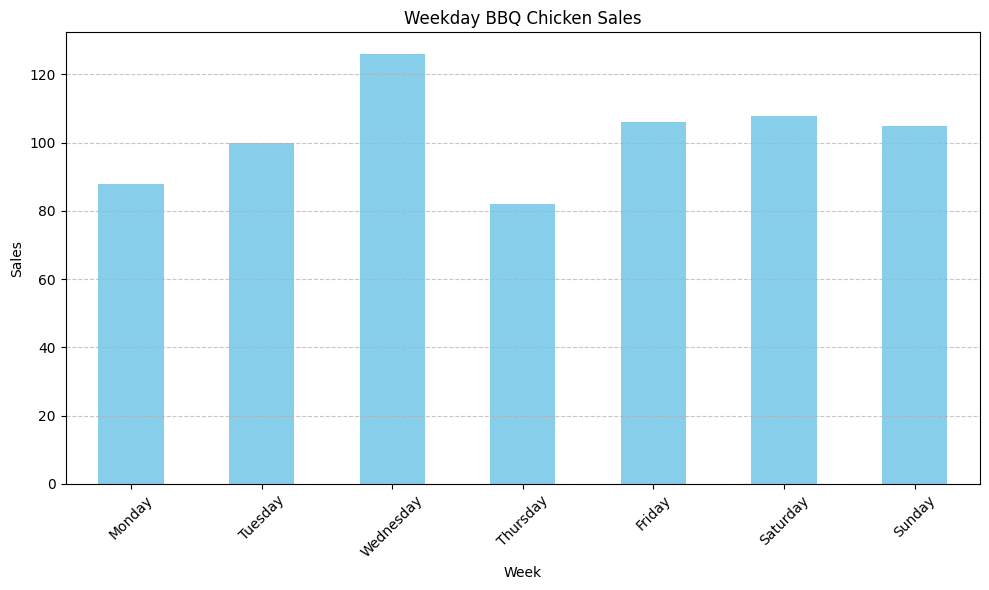

In [10]:
weekday_sales = df.groupby('Weekday')['Quantity'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(ordered_days)

plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='skyblue')
plt.title('Weekday BBQ Chicken Sales')
plt.xlabel('Week')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Average Quantity Sold per Weekday

Average quantity sold per weekday:
Weekday
Monday       11.000000
Tuesday      12.500000
Wednesday    14.000000
Thursday     10.250000
Friday       11.777778
Saturday     11.981889
Sunday       11.666667
Name: Quantity, dtype: float64


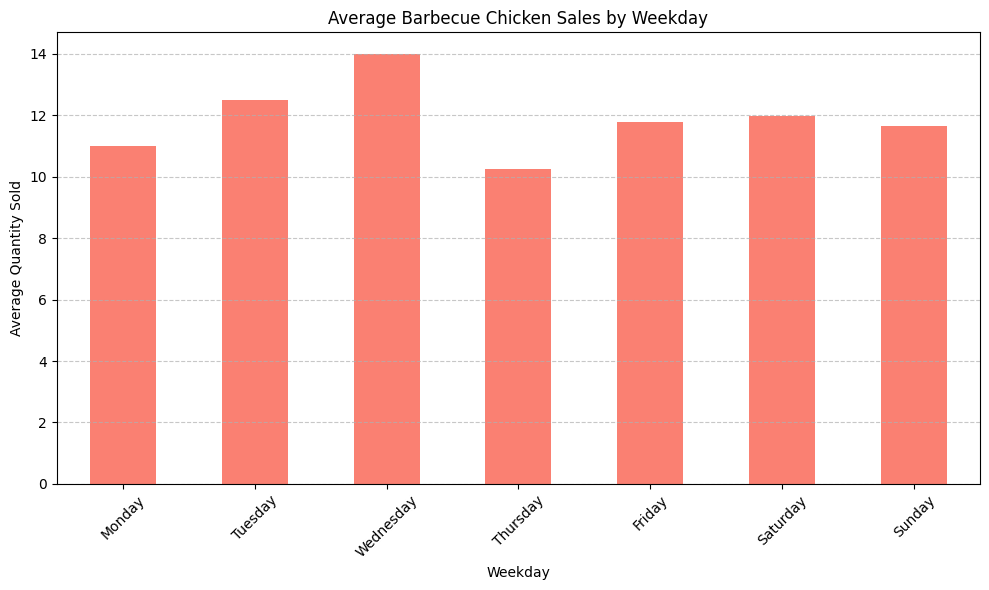

In [14]:
# Group by weekday and calculate the average quantity sold
average_sales_by_weekday = df.groupby('Weekday')['Quantity'].mean()

# Reorder weekdays (Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sales_by_weekday = average_sales_by_weekday.reindex(ordered_days)

# Print the result
print("Average quantity sold per weekday:")
print(average_sales_by_weekday)

# Plot average quantity sold per weekday
plt.figure(figsize=(10, 6))
average_sales_by_weekday.plot(kind='bar', color='salmon')
plt.title('Average Barbecue Chicken Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Sales Value by Weekday

Average sales amount per weekday:
Weekday
Monday        97.140000
Tuesday      109.725000
Wednesday    119.693333
Thursday      89.775000
Friday       102.548889
Saturday     111.480000
Sunday       102.588889
Name: $Total Sales, dtype: float64

Average profit per weekday:
Weekday
Monday        6.940000
Tuesday       7.225000
Wednesday     4.893333
Thursday      5.725000
Friday        5.971111
Saturday     13.228889
Sunday        6.922222
Name: GP $Amount, dtype: float64


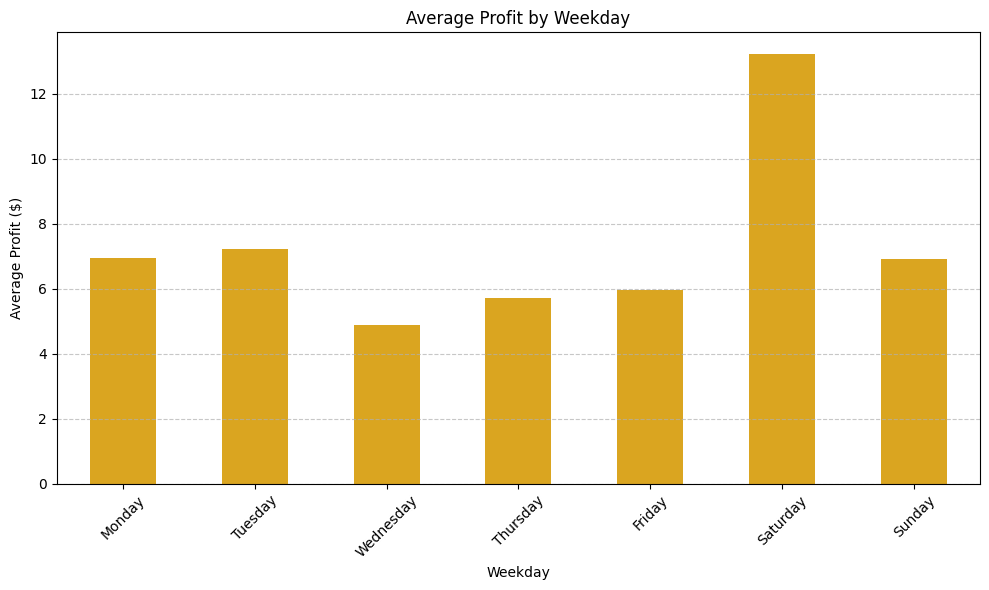

In [17]:
# Convert columns to numeric by removing '$'
df['$Total Sales'] = df['$Total Sales'].replace('[\$,]', '', regex=True).astype(float)
df['GP $Amount'] = df['GP $Amount'].replace('[\$,]', '', regex=True).astype(float)

# Group by weekday
average_sales_amount_by_weekday = df.groupby('Weekday')['$Total Sales'].mean()
average_profit_by_weekday = df.groupby('Weekday')['GP $Amount'].mean()

# Reorder weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sales_amount_by_weekday = average_sales_amount_by_weekday.reindex(ordered_days)
average_profit_by_weekday = average_profit_by_weekday.reindex(ordered_days)

# Print results
print("Average sales amount per weekday:")
print(average_sales_amount_by_weekday)

print("\nAverage profit per weekday:")
print(average_profit_by_weekday)

# Plot average profit per weekday
plt.figure(figsize=(10, 6))
average_profit_by_weekday.plot(kind='bar', color='goldenrod')
plt.title('Average Profit by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
